## <center>**Anime Recommendation Analysis**</center>

<a id=section1></a>

---
# **Introduction**
---

**Anime has become a cultural phenomenon with a global fanbase, and understanding what drives audience engagement is crucial for content creators, viewers, and recommendation engines. This analysis delves into the dynamics of anime preferences by examining genre popularity, ratings distribution, and other critical factors that contribute to the appeal of various anime titles. Here’s a detailed look at the key insights revealed through data exploration and visualization.**

<a id=section2></a>

---
# **Importing Libraries**
---

In [1]:
import re
#--------------------------------------------------------------------------------
import os 
#--------------------------------------------------------------------------------
import pandas as pd

#--------------------------------------------------------------------------------
import numpy as np

#--------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
from matplotlib import cm

#--------------------------------------------------------------------------------
import plotly.graph_objects as go
import plotly.express as px



<a id=section3></a>

---
#  Reading Datasets
---

## Loading Anime Data

In [2]:
usecols = ['anime_id', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped','Members','Popularity']
anime=pd.read_csv('animes.csv',usecols=usecols)

print("Shape of the Dataset:",anime.shape)

Shape of the Dataset: (17562, 14)


C:\Users\shesa\AppData\Local\Temp\ipykernel_14792\908554068.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  anime=pd.read_csv('animes.csv',usecols=usecols)


In [3]:
anime[['anime_id', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped','Members','Popularity']] = anime[['anime_id', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped','Members','Popularity']].replace("Unknown",0)
anime.head(3)

,anime_id,Name,Score,Genres,English name,Type,Episodes,Aired,Premiered,Source,Rating,Popularity,Members,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Original,R - 17+ (violence & profanity),39,1251960,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,Movie,1,"Sep 1, 2001",0,Original,R - 17+ (violence & profanity),518,273145,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Manga,PG-13 - Teens 13 or older,201,558913,13925


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      17562 non-null  int64 
 1   Name          17562 non-null  object
 2   Score         17561 non-null  object
 3   Genres        17562 non-null  object
 4   English name  17562 non-null  object
 5   Type          17562 non-null  object
 6   Episodes      17562 non-null  object
 7   Aired         17562 non-null  object
 8   Premiered     17562 non-null  object
 9   Source        17562 non-null  object
 10  Rating        17562 non-null  object
 11  Popularity    17562 non-null  object
 12  Members       17562 non-null  object
 13  Dropped       17562 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 1.9+ MB


**Observation:**

- We have **2 int64 data type features, 11 object data type features** in the independent features.

## Loading Anime_with_Synopsis Data

In [5]:
usecols=['anime_id',	'Name',	'Score', 'Genres', 'sypnopsis']
anime_with_synopsis=pd.read_csv('Anime_with_synopsis.csv',usecols=usecols)

print("Shape of the Dataset:",anime_with_synopsis.shape)

Shape of the Dataset: (16214, 5)


## Loading animelist Data

In [9]:
animelist=pd.read_csv('animelist.csv')

print("Shape of the Dataset:",animelist.shape)

Shape of the Dataset: (109224747, 5)


In [9]:
animelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


**Observation:**

- We have **5 int64 data type features** in the independent features.

In [10]:
print('Missing Values in User Dataset:')
print(animelist.isnull().sum())

Missing Values in User Dataset:
user_id             0
anime_id            0
rating              0
watching_status     0
watched_episodes    0
dtype: int64


## Loading rating_complete Data

In [4]:
rating_complete=pd.read_csv('rating_complete.csv')

print("Shape of the Dataset:",rating_complete.shape)

Shape of the Dataset: (1048575, 3)


In [15]:
rating_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1048575 non-null  int64
 1   anime_id  1048575 non-null  int64
 2   rating    1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


**Observation:**

- We have **3 int64 data type** features in the independent features.

## Loading watching_status Data

In [11]:
watching_status=pd.read_csv('watching_status.csv')

print("Shape of the Dataset:",watching_status.shape)

Shape of the Dataset: (5, 2)


<a id=section6></a>

---
#  Exploratory Data Analysis
---

In [17]:
anime.describe()

,anime_id,Dropped
count,17562.000000,17562.000000
mean,21477.192347,1249.725601
std,14900.093170,6441.029389
min,1.000000,0.000000
25%,5953.500000,37.000000
50%,22820.000000,77.000000
75%,35624.750000,272.000000
max,48492.000000,339621.000000


**Observations**:

- The descriptive statistics of Anime.csv show the central tendencies, distribution spread, and range of numerical columns in the dataset, such as Score and Members.

- This helps in understanding the variability and any potential outliers in these metrics.

In [14]:
anime['Aired'].value_counts()

Aired
0                               309
2005                             57
2004                             49
2003                             46
2021 to ?                        46
                               ... 
Oct 1, 1981                       1
Dec 18, 2009 to Jul 26, 2010      1
Dec 26, 2009                      1
Apr 5, 1993 to Jan 27, 1994       1
Mar 17, 2021 to ?                 1
Name: count, Length: 11950, dtype: int64

**Observations**:

- The Aired date distribution reveals how anime releases are spread over different periods.

- The **Aired Date** of most animes are unknown which is represented by **0**.

- **2005** and **2004** are the years with most animes being **aired** with **57** and **49** animes respectively.

- **March 21st 2021** is the date with least number of anime being **aired**.

In [9]:
anime['Score'].value_counts()

Score
6    5291
0    5159
7    3228
5    2840
8     533
4     441
3      47
2      12
9      10
1       1
Name: count, dtype: int64

**Observations**:

- The score values’ distribution highlights popular rating ranges which is **7** rated by **4699 users** followed by **6** with **4497 users** identifying **7** is the score bands most anime fall under.
  
- The least popular rating range which is **2** rated by **8 users**. 
  
- It is also observed that most animes does not have any **rating** which is represented by **0**.

In [21]:
type_count = anime['Type'].value_counts()
type_counts_more_than_one = type_count[type_counts > 1]
type_counts_more_than_one

Type
TV         4987
OVA        3892
Movie      3033
Special    2209
ONA        1905
Music      1469
0            37
Name: count, dtype: int64

**Observations**:

- By examining the count of anime by type (e.g., TV, Movie, OVA), this analysis uncovers the most common formats in the dataset, useful for recommendations focused on specific anime types preferred by users.

- The most common type of animes are **TV** with **4987** animes.

In [15]:
anime['Premiered'].value_counts()

Premiered
0               12795
Spring 2017        86
Fall 2016          78
Spring 2018        76
Spring 2016        74
                ...  
Oct 24, 2001        1
Dec 22, 1999        1
Dec 3, 2015         1
Jun 27, 2008        1
Dec 5, 2019         1
Name: count, Length: 255, dtype: int64

**Observation:**

- The Premiered date distribution reveals how anime releases are spread over different periods.

- The Premiered Date of most animes are unknown which is represented by **0**.

- **Spring 2017** and **Fall 2016** are the dates with most animes being Premiered with **86** and **78** animes respectively.

- **Dec 5, 2019** is the date with least number of anime being aired with only **1** anime.

<a id=section6></a>

---
# Data Visualization
---

### Top 10 Anime based on rating counts

In [22]:
df = animelist.iloc[:18522589,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522589 entries, 0 to 18522588
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 706.6 MB


In [23]:
anime_fulldata=pd.merge(anime,df,on='anime_id')

In [9]:
anime_ratingCount = (anime_fulldata.
     groupby(by = ['Name'])['rating'].count().reset_index()[['Name', 'rating']])

C:\Users\shesa\AppData\Local\Temp\ipykernel_10912\2850490036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x="Name", y="rating", data=top10_animerating, palette="YlOrBr")
C:\Users\shesa\AppData\Local\Temp\ipykernel_10912\2850490036.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")


Text(0, 0.5, 'User Rating count')

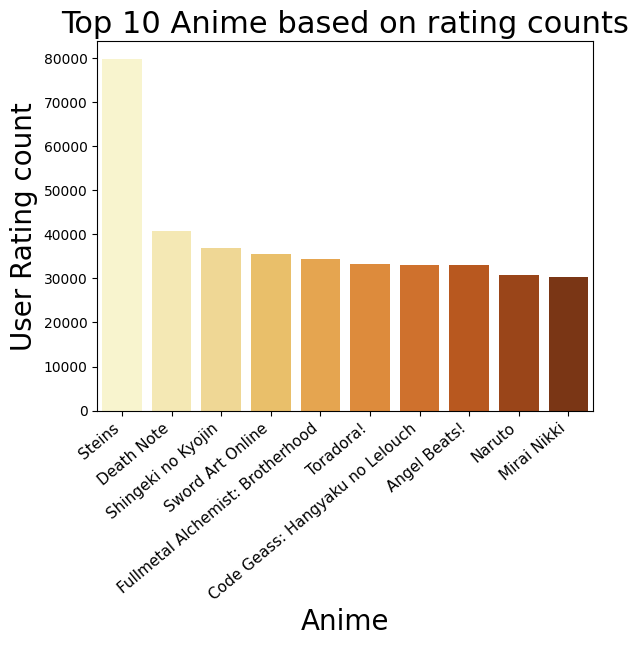

In [10]:
top10_animerating=anime_ratingCount[['Name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)
ax=sns.barplot(x="Name", y="rating", data=top10_animerating, palette="YlOrBr")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)


**Observations**:

Top 10 Anime by Rating Count (Bar Plot):

- This bar plot highlights the top 10 anime with the highest number of ratings. It shows which anime titles have the largest user engagement, indicating their popularity or cultural impact.
  
- It is observed in the above plot that **Steins** is the most rated anime with close to **80,000** rating points followed by **Death Note** with close to **40,000** rating points.

### Count of Anime Titles by Type

C:\Users\shesa\AppData\Local\Temp\ipykernel_10876\2391111913.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anime_type_counts.index, y=anime_type_counts.values, palette="viridis")


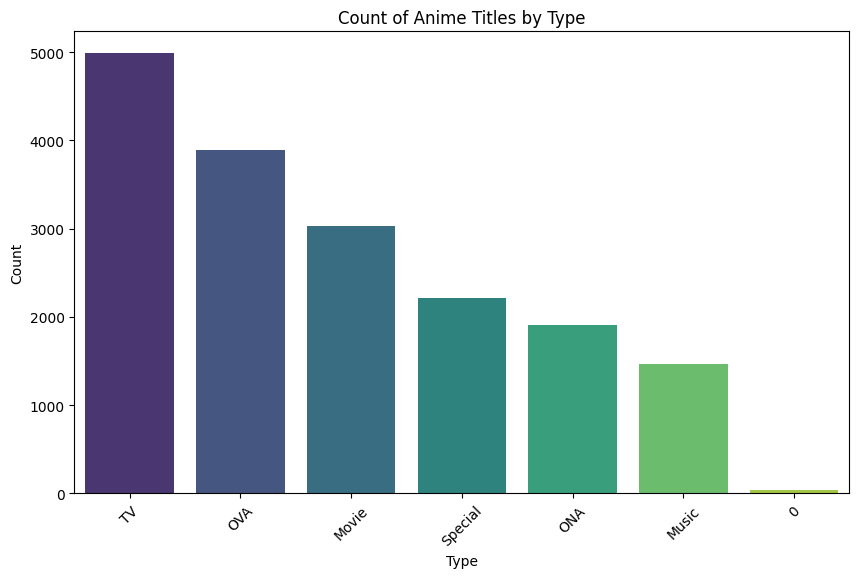

In [22]:
anime_type_counts = type_counts_more_than_one
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=anime_type_counts.index, y=anime_type_counts.values, palette="viridis")
plt.title("Count of Anime Titles by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**:

Anime Titles by Type (Bar Plot):

- This visualization displays the distribution of anime by type, such as TV, Movie, and OVA.
  
- It reveals that **TV** type dominates the dataset with close to **5000** animes in this **Type** Category, providing insights into the most common formats preferred in the anime industry.

- The plot also reveals that **0** is the **Type** which has animes that falls under none of the **Type** category. 

### Top 15 Animes by Number of Users

In [24]:
## convert member from object to integer
anime['Members'] = pd.to_numeric(anime['Members'], errors='coerce')
anime['Members'] = anime['Members'].fillna(0)
anime['Members'] = anime['Members'].astype(int)


C:\Users\shesa\AppData\Local\Temp\ipykernel_5316\2911705255.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shesa\AppData\Local\Temp\ipykernel_5316\2911705255.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shesa\AppData\Local\Temp\ipykernel_5316\2911705255.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

C:\Users\shesa\AppData\Local\Temp\ipykernel_5316\700277468.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




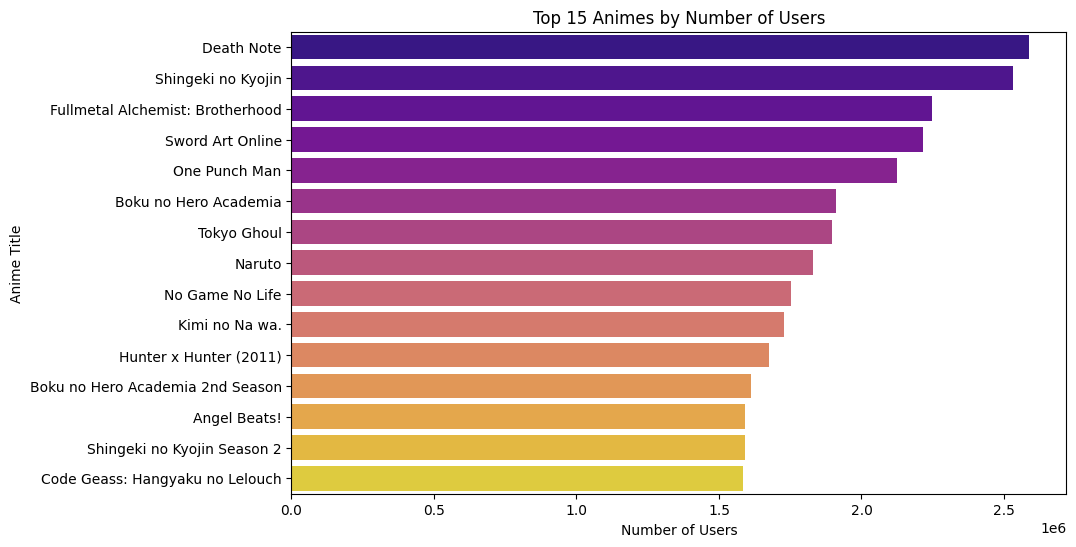

In [26]:
anime_title_by_users = anime[['Name', 'Members']].sort_values(by='Members', ascending=False).head(15)

# Plot the top 15 anime by number of users
plt.figure(figsize=(10, 6))
sns.barplot(x='Members', y='Name', data=anime_title_by_users, palette="plasma")
plt.title("Top 15 Animes by Number of Users")
plt.xlabel("Number of Users")
plt.ylabel("Anime Title")
plt.show()

**Observations**:

Top 15 Anime by Number of Users (Horizontal Bar Plot):

- At first, The member is converted from object to integer(64).
  
- By plotting the top 15 anime titles by the number of users, this chart showcases which anime have the largest fan base or user interest, useful for spotting mainstream titles that might drive recommendations.

- It is observed that **Death Note** has most number of users/viewers followed by **Shingeki no Kyojin**.

### Count of Anime Titles by Genre

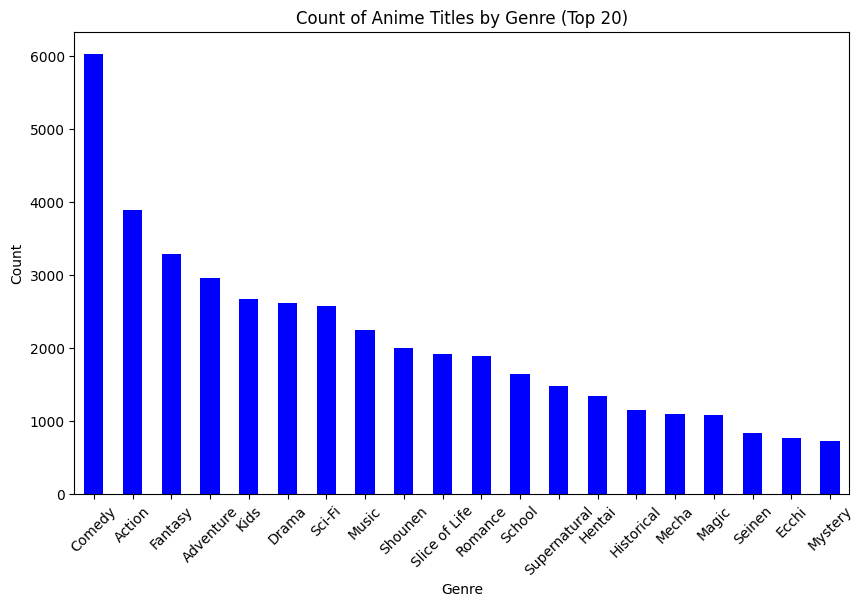

In [7]:
anime_genres = anime['Genres'].str.split(", ").explode().value_counts()

# Plot the top 20 genres
plt.figure(figsize=(10, 6))
anime_genres[:20].plot(kind='bar', color='b')
plt.title("Count of Anime Titles by Genre (Top 20)")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Observations**:

Count of Anime Titles by Genre (Bar Plot):

- This bar plot presents the top 20 genres, revealing genre popularity across the dataset. It helps identify common themes or content types, useful for genre-based recommendations.

- The above plot reveals that **Comedy** is the most common **genre** in the dataset with close to **6000** animes falling under this category followed by **Action** with close to **4000** Animes.


### Distribution of Anime Genres

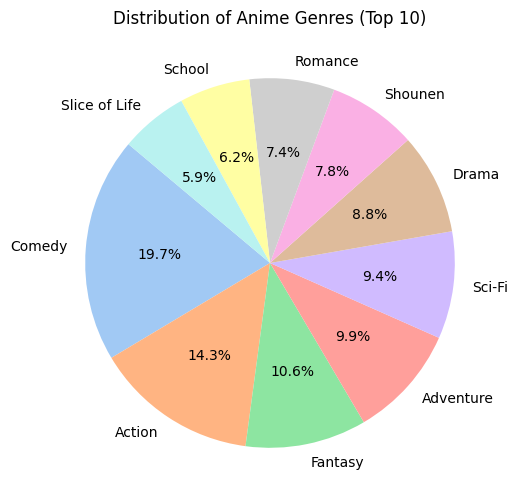

In [28]:
plt.figure(figsize=(10, 6))
anime_genres[:10].plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Distribution of Anime Genres (Top 10)")
plt.ylabel('')
plt.show()

**Observations**:

Distribution of Anime Genres:

- The genre distribution shows the prevalence of different genres, indicating which themes or categories are most popular or widely represented.

- Genres with higher counts **(e.g., Action, Comedy with 19.7% and 14.3% respectively)** are likely preferred by a broader audience, while niche genres may attract more specific user groups.

### How Many Anime in Each Year

C:\Users\shesa\AppData\Local\Temp\ipykernel_5316\186084523.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



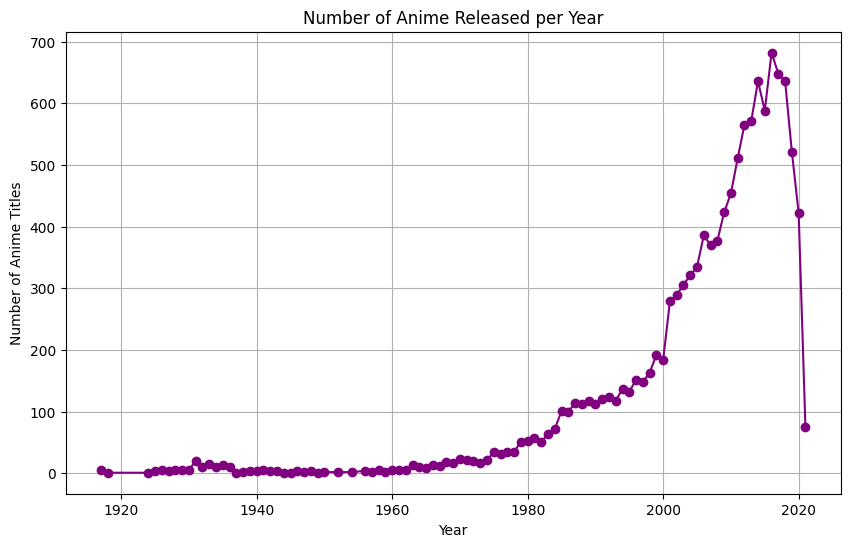

In [29]:
anime['Aired_Year'] = anime['Aired'].str.extract(r'(\d{4})').astype(float)

# Count the number of anime per year
anime_per_year = anime['Aired_Year'].value_counts().sort_index()

# Plot the number of anime per year
plt.figure(figsize=(10, 6))
anime_per_year.plot(kind='line', marker='o', color='purple')
plt.title("Number of Anime Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Anime Titles")
plt.grid(True)
plt.show()

**Observations**:

How Many Anime in Each Year:

- This plot illustrates the count of anime released each year, highlighting trends over time.
  
-  Peaks in specific years **(specifically from 2000 to 2010)** suggest industry growth periods, while declines may reflect changes in production focus or external influences affecting anime output.

### Anime Score vs. Number of Scores

In [5]:
## convert member from object to integer
anime['Popularity'] = pd.to_numeric(anime['Popularity'], errors='coerce')
anime['Popularity'] = anime['Popularity'].fillna(0)
anime['Popularity'] = anime['Popularity'].astype(int)

anime['Score'] = pd.to_numeric(anime['Score'], errors='coerce')
anime['Score'] = anime['Score'].fillna(0)
anime['Score'] = anime['Score'].astype(int)

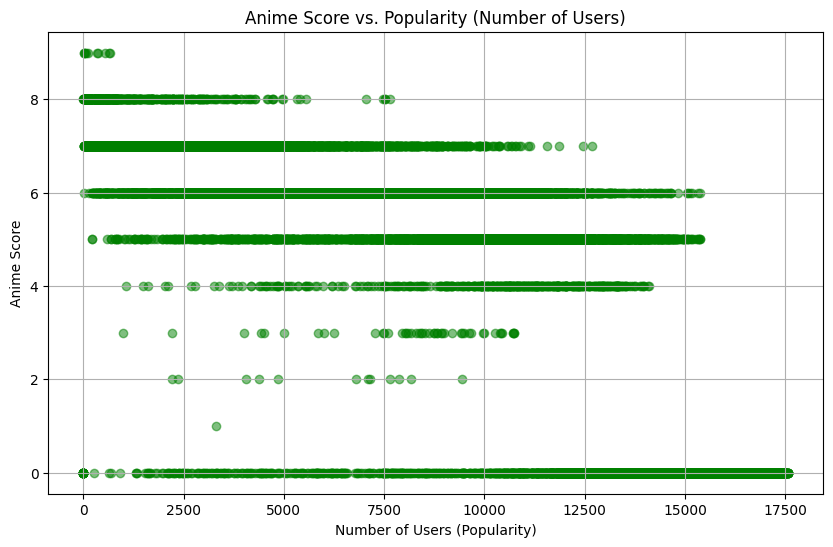

In [17]:
anime_scores = anime['Score']
anime_popularity = anime['Popularity']

# Plot Score vs. Popularity (Number of Users)
plt.figure(figsize=(10, 6))
plt.scatter( anime_popularity, anime_scores, alpha=0.5, color='g')
plt.title("Anime Score vs. Popularity (Number of Users)")
plt.xlabel("Number of Users (Popularity)")
plt.ylabel("Anime Score")

plt.grid(True)
plt.show()

**Observations**:

Anime Score vs. Number of Scores:

- This scatter plot reveals the relationship between anime scores and the number of ratings.
  
- In this plot, It is observed that most of the animes are rated **6** by maximum **users**.

- **2** is the least rated **score** by **users**.


### Distribution of Anime Scores by Type

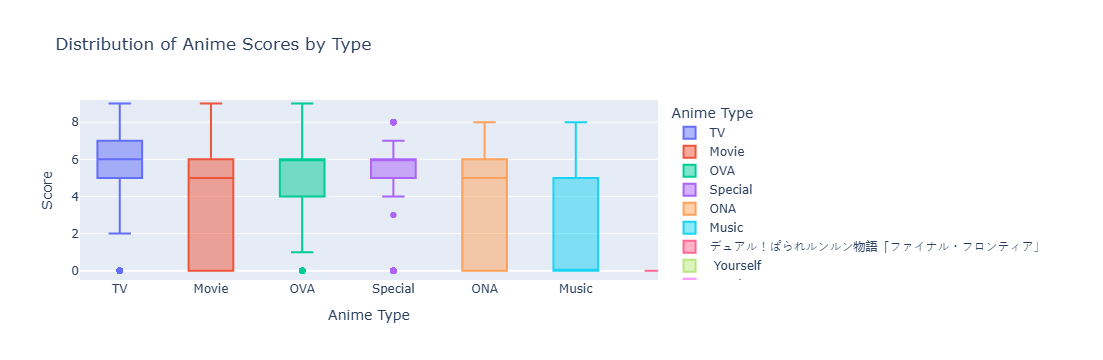

<Figure size 2000x2000 with 0 Axes>

In [10]:
# Create a box plot for anime scores by type
fig = plt.figure(figsize=(20, 20))
fig = px.box(anime, x='Type', y='Score', 
             labels={'Type':'Anime Type', 'Score':'Score'},
             title='Distribution of Anime Scores by Type',
             color='Type')

fig.show()

**Observations**:

Distribution of Anime Scores by Type:

- Analyzing score distribution by anime type (e.g., TV, Movie, OVA) shows if certain types tend to receive higher or lower ratings.
  
- For instance, TV anime might display a wider score range, while movies may lean toward higher ratings due to quality and shorter format.

- It is also observed that the bulk of animes under **TV**, **Movie**, **OVA** and **ONA** **Type** category falls within the **(5-7)** score range with variation in their overall spread (**e.g, Score range of TV is spread throughout the (0-10) while the Special Type is spread through (3-7) Score range)

- **Music** is the category where bulk of its anime resides within **(0-5) Score Range** with overall spread being **0-8** (*including outliers).


### Visualize the relationship between popularity and score by type

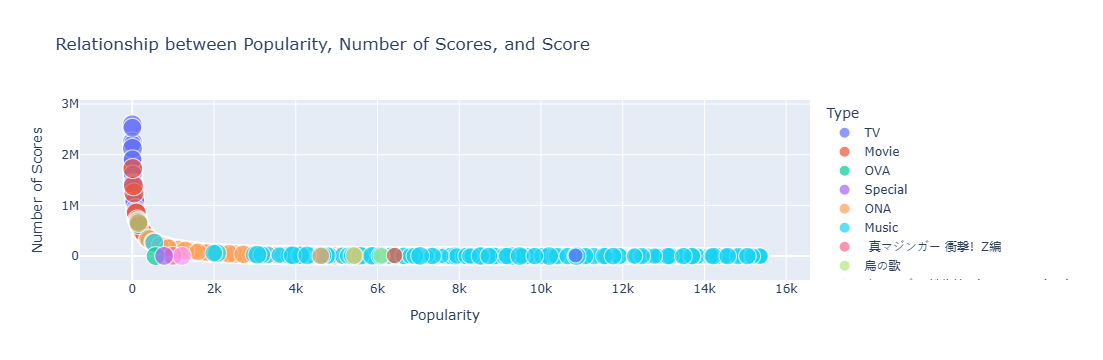

In [48]:
fig = px.scatter(anime, x='Popularity', y='Members', size='Score', color='Type',
                 labels={'Popularity':'Popularity', 'Members':'Number of Scores'},
                 title='Relationship between Popularity, Number of Scores, and Score')

fig.show()

**Observations**:

Popularity vs. Score by Type:

- This visualization shows the relationship between popularity (e.g., user count or rating frequency) and scores across different anime types.
  
- It highlights **TV** types achieve both high **popularity (2.58 million users)** and **scores (9)**, often signaling widely appreciated and high-quality content in formats like TV series or movies.



### Number of animes in each source

Source
Original          5210
Manga             3824
0                 3571
Visual novel       979
Game               878
Light novel        766
Other              597
Novel              510
Music              317
4-koma manga       288
Web manga          250
Picture book       147
Book               112
Card game           64
Digital manga       15
Radio               12
Funimation           5
White Fox            2
Sunrise              2
Production I.G       2
Name: count, dtype: int64


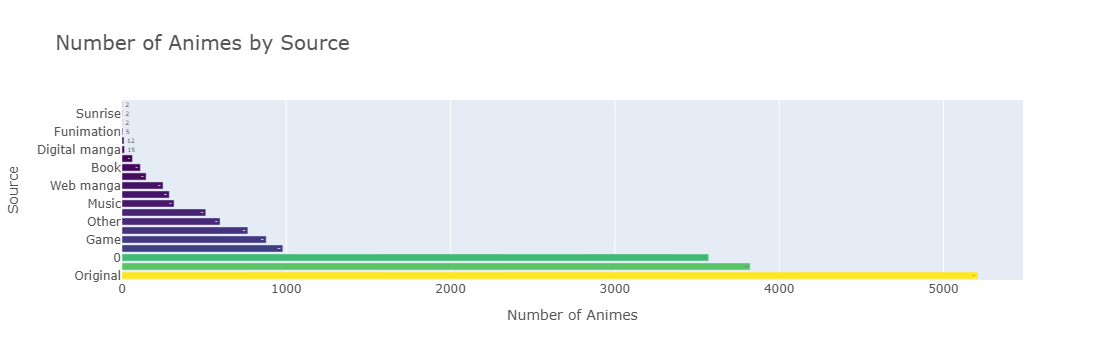

<Figure size 2000x2000 with 0 Axes>

In [13]:

Source_count = anime['Source'].value_counts()
Source_counts = Source_count[Source_count > 1]
print(Source_counts)



fig = plt.figure(figsize=(20, 20))
fig = go.Figure(data=go.Bar(
    x=Source_counts.values,
    y=Source_counts.index,
    orientation='h',  # Set the orientation to horizontal
    marker=dict(color=Source_counts.values, colorscale='Viridis'), 
    text=Source_counts.values,)) 
  

fig.update_layout(
    title='Number of Animes by Source',
    xaxis_title='Number of Animes',
    yaxis_title='Source',
    title_font=dict(size=20),
    font=dict(size=12, color='#555555')
)

fig.show()

**Observations**:

Number of Anime Titles in Each Source:

- The source distribution plot provides insights into the inspiration behind anime (e.g., manga, original work).
  
- A high count from **manga (3824)** suggests it as a primary source. while a smaller count for original works could reflect the challenges of creating new content.

- It is observed that there is **3571** animes that fall under no **source** category and it is represented by **0**.

### Distribution of Anime Scores

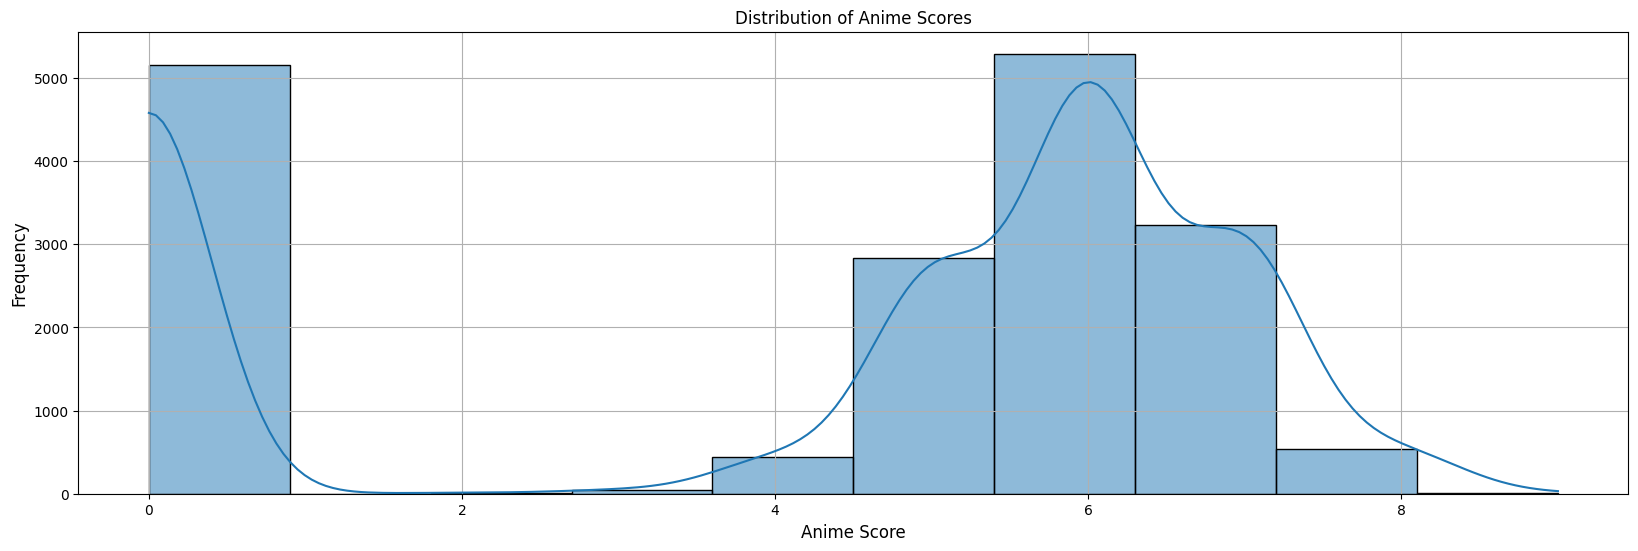

In [23]:
score_counts = anime['Score'].value_counts().sort_index()

# 2. Plot a line plot for score frequency
plt.figure(figsize=(20,6))
sns.histplot(anime['Score'], bins=10, kde=True)

plt.title('Distribution of Anime Scores')
plt.xlabel('Anime Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 4. Show the plot
plt.grid(True)
plt.show()

**Observations**:

Distribution of Anime Scores:

- The overall score distribution illustrates the quality perception in the dataset, with a concentration in specific score ranges **(4-8)** with th peak being observed at **(6)**.
  
-  A normal or skewed distribution indicates general audience satisfaction, while outliers highlight exceptionally loved or disliked titles.

-  It is noticed that There are almost **5000** animes that does not have any **Scores** and are represented by **0 Score**.

### Distribution of Ratings Given by Users

In [24]:
merged_df = pd.merge(rating_complete, anime, on='anime_id')


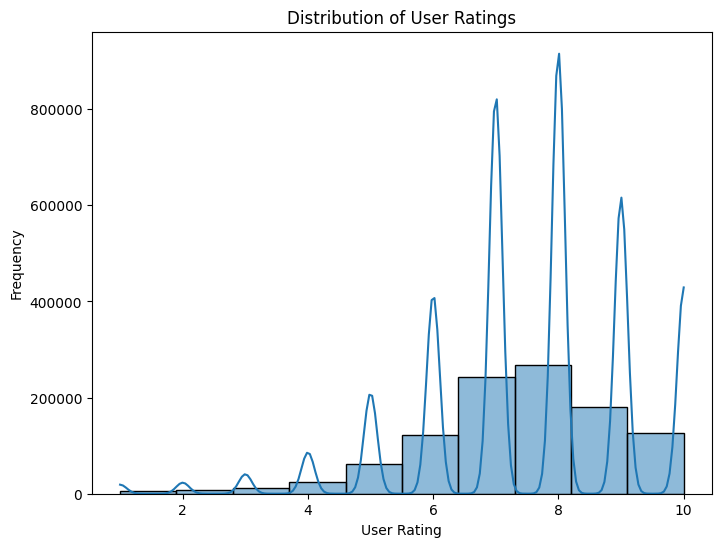

In [35]:

plt.figure(figsize=(8,6))
sns.histplot(merged_df['rating'], bins=10, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

**Observations**:

Distribution of Ratings Given by Users:

- This plot shows how frequently users give particular ratings.

-   A prevalence of high or mid-range ratings can reveal user rating tendencies and bias, which is crucial in recommendation models to avoid inflation or deflation effects.

-   In this plot, A normal right skewed distribution is observed with the skewness ranging between **4-10** and **8** being the **high point/peak**.

### Average rating per user_id

In [37]:

avg_rating_per_user = merged_df.groupby('user_id')['rating'].mean().reset_index()
avg_rating_per_user.columns = ['user_id', 'average_rating']
print("\nAverage Rating per User:")
print(avg_rating_per_user)


Average Rating per User:
      user_id  average_rating
0           0        7.400000
1           1        8.058252
2           2        8.333333
3           3        7.603175
4           4        7.652542
...       ...             ...
5885     6741        8.857143
5886     6742        7.263158
5887     6743        8.069565
5888     6744        7.961039
5889     6745        8.979592

[5890 rows x 2 columns]


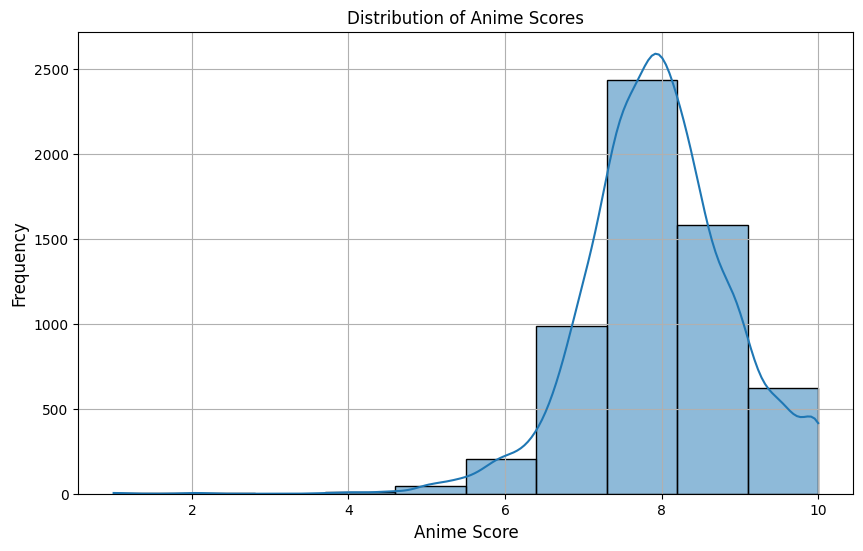

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(avg_rating_per_user['average_rating'], bins=10, kde=True)

plt.title('Distribution of Anime Scores')
plt.xlabel('Anime Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 4. Show the plot
plt.grid(True)
plt.show()

**Observations**:

Average Rating per User ID:

- Examining average ratings by user helps identify user behavior patterns, with users giving consistently high or low ratings potentially impacting overall anime averages.

- Outliers in average ratings indicate especially critical or generous users **(0-3)**.

- In this plot, A right skewed distribution is observed with the skewness ranging between **4-10** and **8** being the **high point/peak**.

### Analyze Ratings Based on Watching Status

In [13]:
merged_df = pd.merge(watching_status, animelist, on='watching_status')
merged_df.head()

,watching_status,description,user_id,anime_id,rating,watched_episodes
0,1,Currently Watching,0,67,9,1
1,1,Currently Watching,0,6702,7,4
2,1,Currently Watching,0,242,10,4
3,1,Currently Watching,0,4898,0,1
4,1,Currently Watching,0,21,10,0


watching_status
1     5228658
2    68089751
3     3700514
4     4266591
6    27938693
Name: count, dtype: int64


C:\Users\shesa\AppData\Local\Temp\ipykernel_5760\1506239502.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


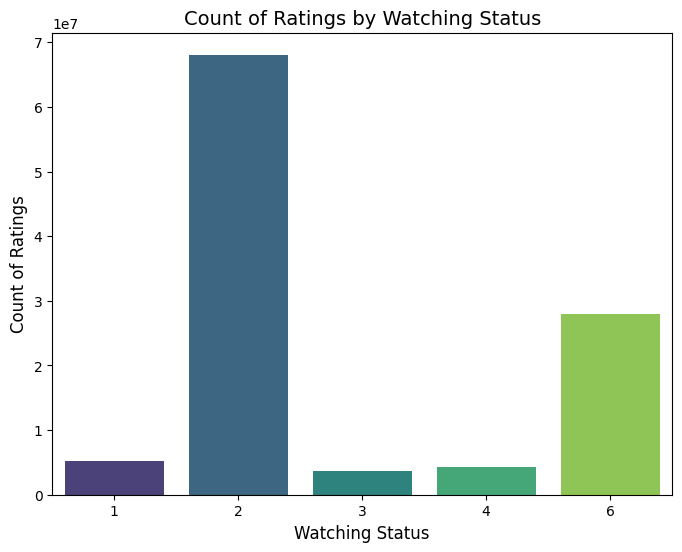

In [15]:
print(merged_df['watching_status'].value_counts().sort_index())
status_counts = merged_df['watching_status'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Count of Ratings by Watching Status', fontsize=14)
plt.xlabel('Watching Status', fontsize=12)
plt.ylabel('Count of Ratings', fontsize=12)

plt.show()

**Observations**:

Analyze Ratings Based on Watching Status:

- This analysis explores how user ratings vary based on watching status (e.g., Completed, Dropped).

- Higher ratings for completed shows and lower for dropped indicate user engagement’s influence on rating satisfaction.

### Analyzing the Average Rating Based on Watching Status

C:\Users\shesa\AppData\Local\Temp\ipykernel_5760\1057815762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_status.index, y=avg_rating_by_status.values, palette='rocket')


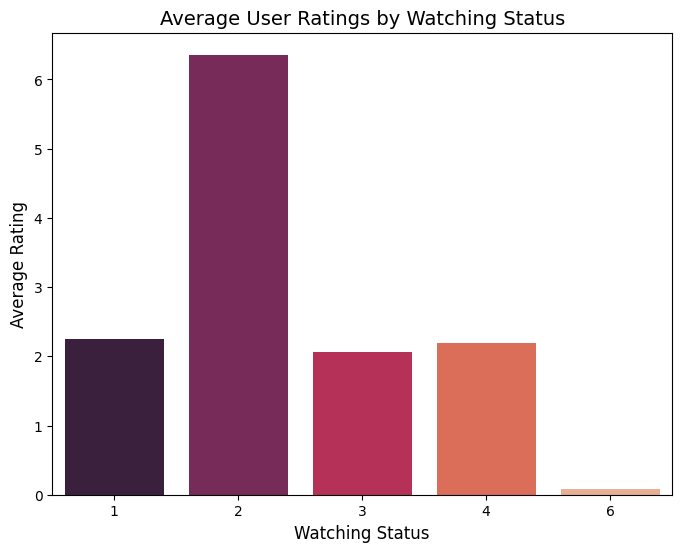

In [16]:
avg_rating_by_status = merged_df.groupby('watching_status')['rating'].mean().sort_index()

# Plotting Average Rating by Status
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rating_by_status.index, y=avg_rating_by_status.values, palette='rocket')
plt.title('Average User Ratings by Watching Status', fontsize=14)
plt.xlabel('Watching Status', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.show()

**Observations**:

Average Rating Based on Watching Status:

- By averaging ratings across watching statuses, this plot shows if users rate completed anime higher than dropped ones, supporting the notion that commitment often correlates with favorable ratings.

- The **watching status [2] (completed)** are the Category with **Highest Average Ratings (6)**.

<a id=section7></a>

---
 **Conclusion**
---

Based on the exploratory data analysis and visualizations, several key insights emerge that deepen our understanding of anime trends, viewer preferences, and rating behaviors:

- Popularity of Genres: Certain genres, such as Action, Comedy, and Drama, dominate the anime landscape, indicating a broad appeal. Niche genres attract specific fanbases, revealing a diverse yet segmented audience base within the anime community.

- Trends in Anime Releases: Yearly release data shows distinct peaks, often corresponding with shifts in media consumption patterns and industry expansions. This trend underscores the impact of external factors, like streaming, on anime production volumes.

- Score Patterns and Viewer Engagement: High scores and rating counts correlate with popular anime titles, reflecting consistent audience approval. Different anime types show distinct score distributions, with movies often rated higher, possibly due to their compact, high-quality format.

- Viewer Behavior and Rating Patterns: Ratings are positively skewed, indicating a tendency for viewers to rate higher. Completed anime generally receive higher ratings than dropped ones, suggesting that viewer satisfaction is strongly linked to completion status.

- Source of Content: The preference for adaptations from manga highlights its role as a primary content source, while the limited original content suggests industry caution regarding new stories.


**Final Words**:

These findings provide valuable guidance for creating targeted recommendation systems that align with both popular and niche viewer preferences. Recognizing trends in genre popularity, engagement levels, and viewer completion behaviors can help improve content suggestions, enhancing the user experience and fostering greater viewer satisfaction across platforms.


